In [14]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Text(0.5, 1.0, 'Data generated by make_moons() function')

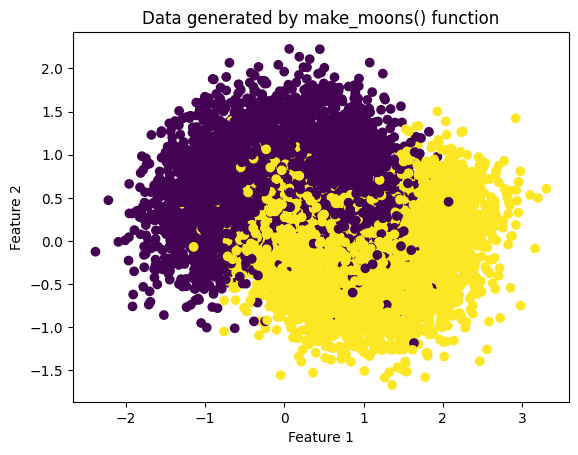

In [6]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')

In [7]:
data = pd.DataFrame({'Feature 1': X[:, 0], 'Feature 2': X[:, 1], 'Label': y})

print(data.describe())

          Feature 1     Feature 2         Label
count  10000.000000  10000.000000  10000.000000
mean       0.504596      0.247833      0.500000
std        0.951356      0.632287      0.500025
min       -2.386711     -1.667158      0.000000
25%       -0.183312     -0.211749      0.000000
50%        0.517442      0.235856      0.500000
75%        1.185141      0.707281      1.000000
max        3.308359      2.225215      1.000000


In [8]:
data.head()

,Feature 1,Feature 2,Label
0,0.940291,0.122306,1
1,0.124540,-0.424775,0
2,0.261988,0.508414,0
3,-0.495238,0.072589,0
4,-0.879413,0.549373,0


Text(0.5, 1.0, 'Pairplot of Features')

<Figure size 1000x500 with 0 Axes>

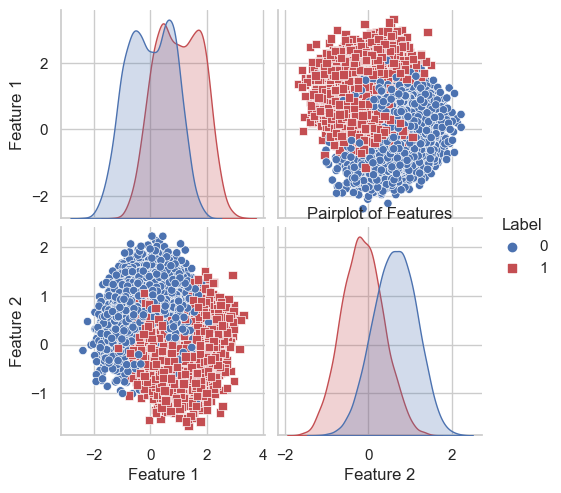

In [9]:
# Data Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Pairplot to visualize relationships between features
sns.pairplot(data=data, hue="Label", palette={0: 'b', 1: 'r'}, markers=['o', 's'])
plt.title("Pairplot of Features")

Text(0.5, 1.0, 'Scatter Plot of Features')

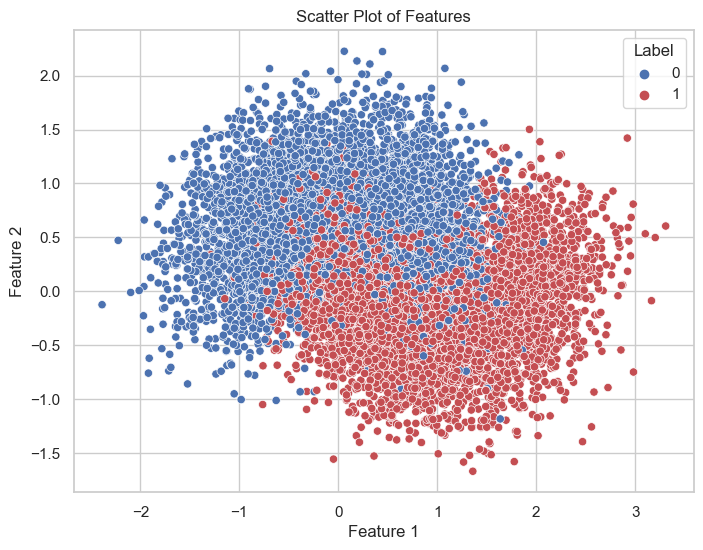

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Feature 1", y="Feature 2", hue="Label", palette={0: 'b', 1: 'r'}, markers=['o', 's'])
plt.title("Scatter Plot of Features")

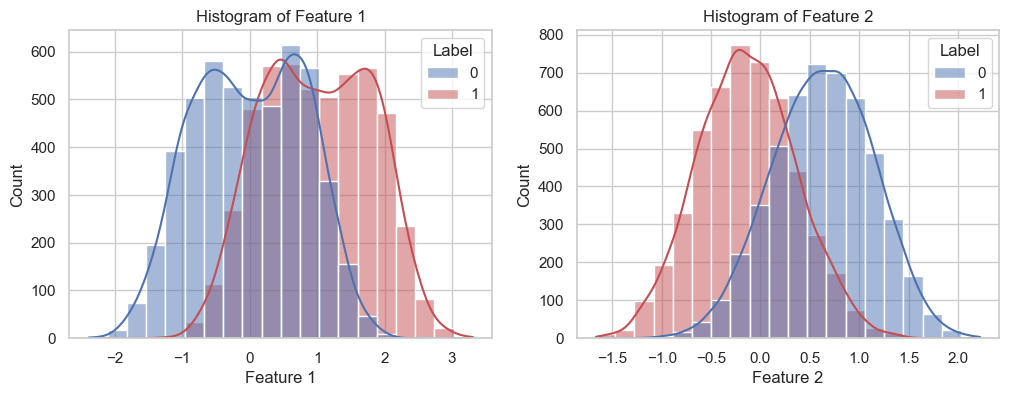

In [11]:
# Histograms for feature distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x="Feature 1", hue="Label", kde=True, bins=20, palette={0: 'b', 1: 'r'})
plt.title("Histogram of Feature 1")

plt.subplot(1, 2, 2)
sns.histplot(data=data, x="Feature 2", hue="Label", kde=True, bins=20, palette={0: 'b', 1: 'r'})
plt.title("Histogram of Feature 2")

plt.show()

## Create model function and set range of hyperparameters

In [15]:
from keras_tuner.tuners import RandomSearch

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=256, step=32), input_dim=2, activation='relu'))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  metrics=['accuracy'])
    
    return model

In [18]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    directory='my_tuner_directory',  # Directory to save results
    project_name='moon_classification'  # Name of the tuning project
)


In [19]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)


Trial 10 Complete [00h 00m 39s]
val_accuracy: 0.8656250238418579

Best val_accuracy So Far: 0.8656250238418579
Total elapsed time: 00h 06m 14s
INFO:tensorflow:Oracle triggered exit


In [27]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [21]:
final_model = build_model(best_hps)
final_model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.3993 - accuracy: 0.8242 - val_loss: 0.3702 - val_accuracy: 0.8381
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8452 - val_loss: 0.3478 - val_accuracy: 0.8519
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8555 - val_loss: 0.3333 - val_accuracy: 0.8587
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8572 - val_loss: 0.3305 - val_accuracy: 0.8556
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8639 - val_loss: 0.3256 - val_accuracy: 0.8575
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8634 - val_loss: 0.3251 - val_accuracy: 0.8581
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3227 - accuracy: 0.8620 - val_loss: 0.3253 - val_accuracy: 0.8600
Epoch 

In [22]:
# Evaluate the model on the test data
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy*100:.2f}%')

63/63 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.8725
Test loss: 0.2973
Test accuracy: 87.25%
